In [1]:
!pip install pandas scikit-learn scipy seaborn numpy

In [2]:
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
path_to_data = "/Users/cp364480/Documents/Synthetic Data Generator/synth_gen"

In [7]:
player_attribute_df = pd.read_csv(f'{path_to_data}/data/player_attribute.csv')
player_attribute_df.head()

,player_id,first_name,last_name
0,0,Kimberly,Brocker
1,1,Jeffrey,Berrios
2,2,Deborah,Keever
3,3,Linda,Caul
4,4,William,Macauley


In [8]:
game_attribute_df = pd.read_csv(f'{path_to_data}/data/game_attribute.csv')
game_attribute_df.head()

,game_id,game_name,wild_symbols,scatter_symbols,free_spins,bonus_rounds,multipliers,jackpots,paylines,reel_mechanisms,gamble_feature,rtp,volatility,themes,mystery_symbols,random_triggers
0,1,Candy Boom,Sticky,No,32,Yes,3,Progressive,49,Megaways,No,90.21,High,Thriller,Yes,Yes
1,2,Wolf Run Dynasty Progressive,Expanding,Yes,29,Yes,8,Progressive,42,Cascading,Yes,13.29,High,Horror,Yes,No
2,3,Lucha Extreme,Regular,Yes,45,No,4,Progressive,14,Cascading,No,78.76,High,Animation,No,No
3,4,Red Hot Sapphires,Expanding,Yes,47,No,7,Progressive,8,Megaways,Yes,54.50,Low,Biography,No,Yes
4,5,Cozy Cat Cash,Regular,No,36,No,2,Progressive,17,Cascading,Yes,43.81,Low,Comedy,Yes,No


In [9]:
player_history_df = pd.read_csv(f'{path_to_data}/data/player_history.csv')
player_history_df.head()

,player_id,game_id
0,0,527
1,0,527
2,0,527
3,0,527
4,0,527


In [10]:
player_history_game_attribute_df = player_history_df.merge(game_attribute_df, how='inner', on='game_id')
player_history_game_attribute_df.head()

,player_id,game_id,game_name,wild_symbols,scatter_symbols,free_spins,bonus_rounds,multipliers,jackpots,paylines,reel_mechanisms,gamble_feature,rtp,volatility,themes,mystery_symbols,random_triggers
0,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
1,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
2,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
3,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
4,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No


In [11]:
player_history_game_attribute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        2912 non-null   int64  
 1   game_id          2912 non-null   int64  
 2   game_name        2912 non-null   object 
 3   wild_symbols     2912 non-null   object 
 4   scatter_symbols  2912 non-null   object 
 5   free_spins       2912 non-null   int64  
 6   bonus_rounds     2912 non-null   object 
 7   multipliers      2912 non-null   int64  
 8   jackpots         2912 non-null   object 
 9   paylines         2912 non-null   int64  
 10  reel_mechanisms  2912 non-null   object 
 11  gamble_feature   2912 non-null   object 
 12  rtp              2912 non-null   float64
 13  volatility       2912 non-null   object 
 14  themes           2912 non-null   object 
 15  mystery_symbols  2912 non-null   object 
 16  random_triggers  2912 non-null   object 
dtypes: float64(1),

In [12]:
player_history_game_attribute_df.isnull().sum()

player_id          0
game_id            0
game_name          0
wild_symbols       0
scatter_symbols    0
free_spins         0
bonus_rounds       0
multipliers        0
jackpots           0
paylines           0
reel_mechanisms    0
gamble_feature     0
rtp                0
volatility         0
themes             0
mystery_symbols    0
random_triggers    0
dtype: int64

In [13]:
played_games = player_history_game_attribute_df.groupby(['player_id', 'game_id', 'game_name']).size().reset_index(name='count')

repeated_players = played_games[played_games['count'] > 1].copy()

repeated_players.loc[:, 'total_games_played'] = repeated_players.groupby('player_id')['count'].transform('sum')

repeated_players = repeated_players.sort_values(by=['total_games_played', 'count'], ascending=[False, False]).reset_index(drop=True)

print("Users who played a game more than once with game ID, game name, count, and total games played (ordered by total games played and count):")
display(repeated_players)

Users who played a game more than once with game ID, game name, count, and total games played (ordered by total games played and count):


,player_id,game_id,game_name,count,total_games_played
0,115,287,Cannon Thunder,11,28
1,122,442,Kings of Chicago,10,28
2,140,849,Super Shot,7,28
3,139,627,Four Guardians,6,28
4,139,853,Mega Fire Blaze: Big Circus!,6,28
...,...,...,...,...,...
666,133,188,Excited Slot 3D 1000X,2,2
667,143,199,Jackpot Jester 50K HQ,2,2
668,177,564,Gods of Luxor,2,2
669,185,468,Time Machine Creator,2,2


In [14]:
player_history_game_attribute_df

,player_id,game_id,game_name,wild_symbols,scatter_symbols,free_spins,bonus_rounds,multipliers,jackpots,paylines,reel_mechanisms,gamble_feature,rtp,volatility,themes,mystery_symbols,random_triggers
0,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
1,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
2,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
3,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
4,0,527,Beatriz Moniz Estaca Prateada,Sticky,No,3,Yes,10,Progressive,2,Cascading,Yes,28.94,High,Western,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,199,147,Ultra Luck,Expanding,Yes,7,Yes,4,Progressive,34,Cascading,No,49.32,Low,Drama,Yes,Yes
2908,199,147,Ultra Luck,Expanding,Yes,7,Yes,4,Progressive,34,Cascading,No,49.32,Low,Drama,Yes,Yes
2909,199,147,Ultra Luck,Expanding,Yes,7,Yes,4,Progressive,34,Cascading,No,49.32,Low,Drama,Yes,Yes
2910,199,147,Ultra Luck,Expanding,Yes,7,Yes,4,Progressive,34,Cascading,No,49.32,Low,Drama,Yes,Yes


In [15]:
data = game_attribute_df.drop(columns=['jackpots'])
data

,game_id,game_name,wild_symbols,scatter_symbols,free_spins,bonus_rounds,multipliers,paylines,reel_mechanisms,gamble_feature,rtp,volatility,themes,mystery_symbols,random_triggers
0,1,Candy Boom,Sticky,No,32,Yes,3,49,Megaways,No,90.21,High,Thriller,Yes,Yes
1,2,Wolf Run Dynasty Progressive,Expanding,Yes,29,Yes,8,42,Cascading,Yes,13.29,High,Horror,Yes,No
2,3,Lucha Extreme,Regular,Yes,45,No,4,14,Cascading,No,78.76,High,Animation,No,No
3,4,Red Hot Sapphires,Expanding,Yes,47,No,7,8,Megaways,Yes,54.50,Low,Biography,No,Yes
4,5,Cozy Cat Cash,Regular,No,36,No,2,17,Cascading,Yes,43.81,Low,Comedy,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Joker Gems,Regular,No,40,Yes,6,31,Cascading,Yes,84.57,High,Sci-Fi,Yes,No
996,997,Aladdin,Regular,Yes,3,Yes,3,5,Megaways,Yes,27.52,High,Fantasy,Yes,No
997,998,Mr. Billionaire,Sticky,No,20,Yes,2,24,Megaways,Yes,42.04,Low,Horror,No,Yes
998,999,81 Vegas Multi Fruits,Sticky,No,10,Yes,6,35,Cascading,Yes,85.95,High,Crime,Yes,No


In [16]:
game_names = list(data.game_name.unique())

# Vectorize the game names using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(game_names)

# Clustering using K-means
num_clusters = 10  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get the cluster labels for each game name
cluster_labels = kmeans.labels_

# Topic Modeling using LDA
num_topics = 10  # Specify the desired number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Get the topic distribution for each game name
topic_distributions = lda.transform(X)

game_name_data = {
    "game_name": game_names,
    "cluster": cluster_labels,
    "dominant_topic": topic_distributions.argmax(axis=1)
}
game_name_df = pd.DataFrame(game_name_data)
game_name_df



game_name_features = game_name_df[['cluster', 'dominant_topic']]
game_name_features

,cluster,dominant_topic
0,0,2
1,0,0
2,0,0
3,0,6
4,5,3
...,...,...
995,0,4
996,0,9
997,0,8
998,0,2


In [17]:
# # game_name
# tfidf = TfidfVectorizer(stop_words='english')
# game_name_tfidf = tfidf.fit_transform(data['game_name'])
# game_name_features = pd.DataFrame(game_name_tfidf.toarray(), columns=[f'game_name_{i}' for i in range(game_name_tfidf.shape[1])])
# game_name_features

In [18]:
# wild_symbols
onehot_encoder = OneHotEncoder()
wild_symbols_onehot = onehot_encoder.fit_transform(data[['wild_symbols']])
wild_symbols_features = pd.DataFrame(wild_symbols_onehot.toarray(), columns=[f'wild_symbols_{category}' for category in onehot_encoder.categories_[0]])
wild_symbols_features

,wild_symbols_Expanding,wild_symbols_Regular,wild_symbols_Sticky
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
995,0.0,1.0,0.0
996,0.0,1.0,0.0
997,0.0,0.0,1.0
998,0.0,0.0,1.0


Shapiro-Wilk test statistic: 0.9554
Shapiro-Wilk p-value: 0.0000


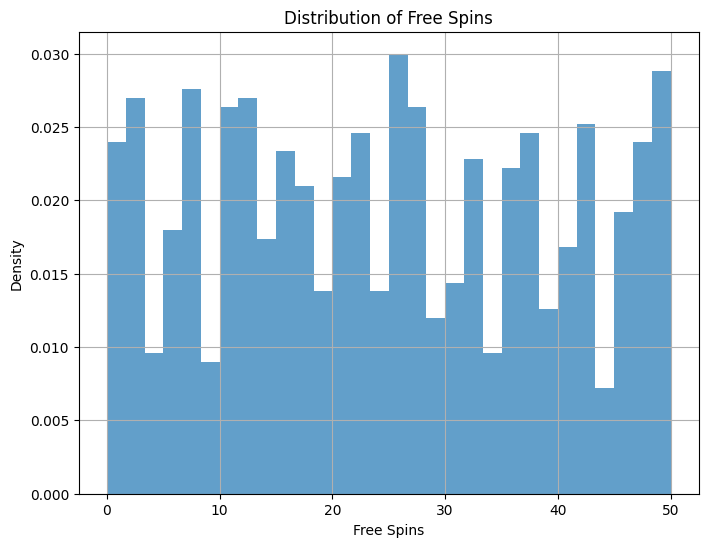

In [19]:
# scatter_symbols
scatter_symbols_features = pd.DataFrame(data['scatter_symbols'].map({'No': 0, 'Yes': 1}), columns=['scatter_symbols'])
scatter_symbols_features

shapiro_result = stats.shapiro(data['free_spins'])
print(f"Shapiro-Wilk test statistic: {shapiro_result.statistic:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_result.pvalue:.4f}")

plt.figure(figsize=(8, 6))
plt.hist(data['free_spins'], bins=30, density=True, alpha=0.7)
plt.xlabel('Free Spins')
plt.ylabel('Density')
plt.title('Distribution of Free Spins')
plt.grid(True)
plt.show()

In [20]:
# free_spins
free_spins_scaler = StandardScaler()
free_spins_scaled = free_spins_scaler.fit_transform(data[['free_spins']])
free_spins_features = pd.DataFrame(free_spins_scaled, columns=['free_spins_scaled'])
free_spins_features

,free_spins_scaled
0,0.506485
1,0.302394
2,1.390878
3,1.526938
4,0.778606
...,...
995,1.050727
996,-1.466391
997,-0.309878
998,-0.990180


Shapiro-Wilk test statistic: 0.9327
Shapiro-Wilk p-value: 0.0000


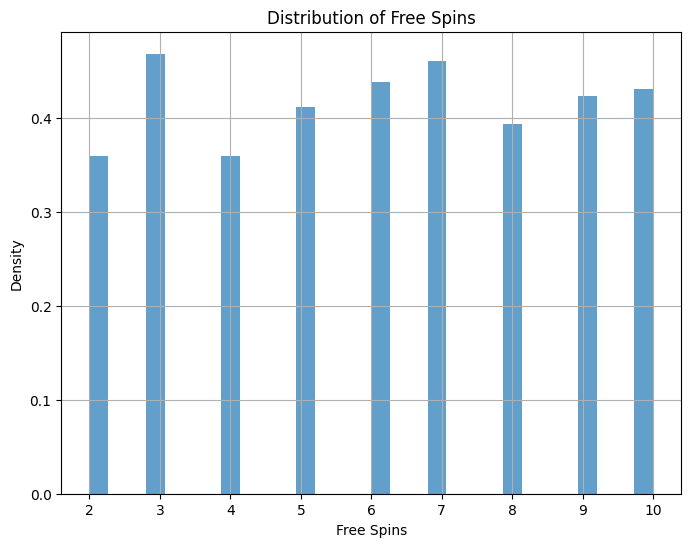

In [21]:
# bonus_rounds
bonus_rounds_features = pd.DataFrame(data['bonus_rounds'].map({'No': 0, 'Yes': 1}), columns=['bonus_rounds'])
bonus_rounds_features

shapiro_result = stats.shapiro(data['multipliers'])
print(f"Shapiro-Wilk test statistic: {shapiro_result.statistic:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_result.pvalue:.4f}")

plt.figure(figsize=(8, 6))
plt.hist(data['multipliers'], bins=30, density=True, alpha=0.7)
plt.xlabel('Free Spins')
plt.ylabel('Density')
plt.title('Distribution of Free Spins')
plt.grid(True)
plt.show()

Shapiro-Wilk test statistic: 0.9490
Shapiro-Wilk p-value: 0.0000


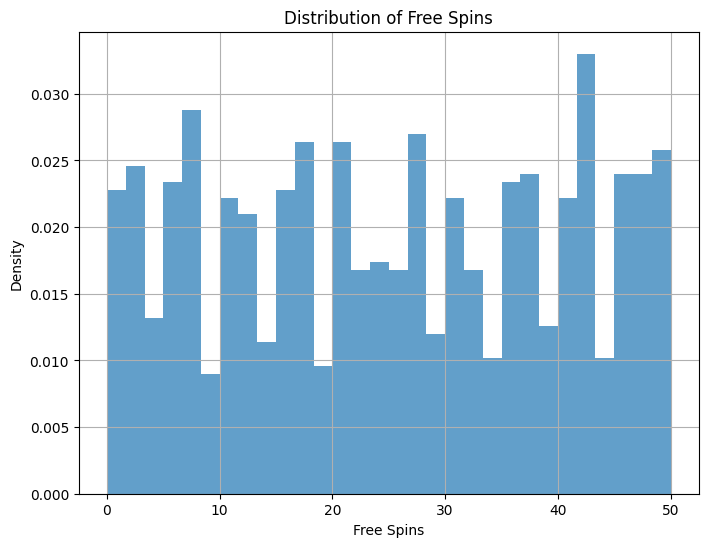

In [22]:
# multipliers
multipliers_scaler = StandardScaler()
multipliers_scaled = multipliers_scaler.fit_transform(data[['multipliers']])
multipliers_features = pd.DataFrame(multipliers_scaled, columns=['multipliers_scaled'])
multipliers_features
shapiro_result = stats.shapiro(data['paylines'])
print(f"Shapiro-Wilk test statistic: {shapiro_result.statistic:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_result.pvalue:.4f}")

plt.figure(figsize=(8, 6))
plt.hist(data['paylines'], bins=30, density=True, alpha=0.7)
plt.xlabel('Free Spins')
plt.ylabel('Density')
plt.title('Distribution of Free Spins')
plt.grid(True)
plt.show()

In [23]:
# paylines
paylines_scaler = StandardScaler()
paylines_scaled = paylines_scaler.fit_transform(data[['paylines']])
paylines_features = pd.DataFrame(paylines_scaled, columns=['paylines_scaled'])
paylines_features

,paylines_scaled
0,1.595073
1,1.126308
2,-0.748752
3,-1.150550
4,-0.547852
...,...
995,0.389678
996,-1.351449
997,-0.079087
998,0.657543


In [24]:
# reel_mechanisms

onehot_encoder_reel = OneHotEncoder()
reel_mechanisms_onehot = onehot_encoder_reel.fit_transform(data[['reel_mechanisms']])
reel_mechanisms_features = pd.DataFrame(reel_mechanisms_onehot.toarray(), columns=onehot_encoder_reel.get_feature_names_out(['reel_mechanisms']))
reel_mechanisms_features

,reel_mechanisms_Cascading,reel_mechanisms_Megaways
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
995,1.0,0.0
996,0.0,1.0
997,0.0,1.0
998,1.0,0.0


Shapiro-Wilk test statistic: 0.9589
Shapiro-Wilk p-value: 0.0000


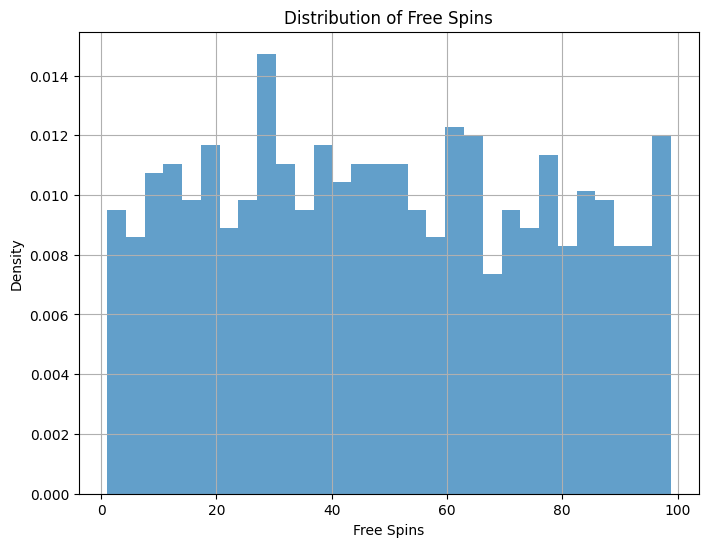

In [25]:
# gamble_feature
gamble_feature_features = pd.DataFrame(data['gamble_feature'].map({'No': 0, 'Yes': 1}), columns=['gamble_feature'])
gamble_feature_features
shapiro_result = stats.shapiro(data['rtp'])
print(f"Shapiro-Wilk test statistic: {shapiro_result.statistic:.4f}")
print(f"Shapiro-Wilk p-value: {shapiro_result.pvalue:.4f}")

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['rtp'], bins=30, density=True, alpha=0.7)
plt.xlabel('Free Spins')
plt.ylabel('Density')
plt.title('Distribution of Free Spins')
plt.grid(True)
plt.show()

In [26]:
# rtp
rtp_scaler = StandardScaler()
rtp_scaled = rtp_scaler.fit_transform(data[['rtp']])
rtp_features = pd.DataFrame(rtp_scaled, columns=['rtp_scaled'])
rtp_features

,rtp_scaled
0,1.479472
1,-1.287174
2,1.067640
3,0.195061
4,-0.189435
...,...
995,1.276613
996,-0.775351
997,-0.253098
998,1.326249


In [27]:
# volatility
volatility_encoder = OrdinalEncoder(categories=[['High', 'Low']])
data['volatility_encoded'] = volatility_encoder.fit_transform(data[['volatility']])
volatility_features = pd.DataFrame(data['volatility_encoded'], columns=['volatility_encoded'])
volatility_features

,volatility_encoded
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
995,0.0
996,0.0
997,1.0
998,0.0


In [28]:
# themes
tfidf = TfidfVectorizer(stop_words='english')
themes_tfidf = tfidf.fit_transform(data['themes'])
themes_features = pd.DataFrame(themes_tfidf.toarray(), columns=[f'themes_{i}' for i in range(themes_tfidf.shape[1])])
themes_features

,themes_0,themes_1,themes_2,themes_3,themes_4,themes_5,themes_6,themes_7,themes_8,themes_9,...,themes_14,themes_15,themes_16,themes_17,themes_18,themes_19,themes_20,themes_21,themes_22,themes_23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [29]:
# mystery_symbols
mystery_symbols_features = pd.DataFrame(data['mystery_symbols'].map({'No': 0, 'Yes': 1}), columns=['mystery_symbols'])
mystery_symbols_features

,mystery_symbols
0,1
1,1
2,0
3,0
4,1
...,...
995,1
996,1
997,0
998,1


In [30]:
# random_triggers
random_triggers_features = pd.DataFrame(data['random_triggers'].map({'No': 0, 'Yes': 1}), columns=['random_triggers'])
random_triggers_features

,random_triggers
0,1
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,0


In [31]:
# Concatenate all feature columns
features = pd.concat([
    game_name_features,
    wild_symbols_features,
    scatter_symbols_features,
    free_spins_features,
    bonus_rounds_features,
    multipliers_features,
    paylines_features,
    reel_mechanisms_features,
    gamble_feature_features,
    rtp_features,
    volatility_features,
    themes_features,
    mystery_symbols_features,
    random_triggers_features
], axis=1)

In [32]:
features

,cluster,dominant_topic,wild_symbols_Expanding,wild_symbols_Regular,wild_symbols_Sticky,scatter_symbols,free_spins_scaled,bonus_rounds,multipliers_scaled,paylines_scaled,...,themes_16,themes_17,themes_18,themes_19,themes_20,themes_21,themes_22,themes_23,mystery_symbols,random_triggers
0,0,2,0.0,0.0,1.0,0,0.506485,1,-1.199943,1.595073,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,1,1
1,0,0,1.0,0.0,0.0,1,0.302394,1,0.753725,1.126308,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0
2,0,0,0.0,1.0,0.0,1,1.390878,0,-0.809209,-0.748752,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0
3,0,6,1.0,0.0,0.0,1,1.526938,0,0.362991,-1.150550,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1
4,5,3,0.0,1.0,0.0,0,0.778606,0,-1.590676,-0.547852,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,0.0,1.0,0.0,0,1.050727,1,-0.027742,0.389678,...,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,1,0
996,0,9,0.0,1.0,0.0,1,-1.466391,1,-1.199943,-1.351449,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0
997,0,8,0.0,0.0,1.0,0,-0.309878,1,-1.590676,-0.079087,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0,1
998,0,2,0.0,0.0,1.0,0,-0.990180,1,-0.027742,0.657543,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1,0


In [33]:
features.shape

(1000, 41)

In [34]:
features.to_csv('feature_dataset.csv', index=False)

In [35]:
game_similarity = cosine_similarity(features)
game_similarity

array([[ 1.        ,  0.08651792,  0.17657461, ...,  0.61072708,
         0.64867523,  0.57868856],
       [ 0.08651792,  1.        , -0.04343713, ...,  0.0696055 ,
         0.22977097,  0.15208159],
       [ 0.17657461, -0.04343713,  1.        , ...,  0.02610289,
         0.05443657,  0.04945074],
       ...,
       [ 0.61072708,  0.0696055 ,  0.02610289, ...,  1.        ,
         0.60863292,  0.84267053],
       [ 0.64867523,  0.22977097,  0.05443657, ...,  0.60863292,
         1.        ,  0.69017177],
       [ 0.57868856,  0.15208159,  0.04945074, ...,  0.84267053,
         0.69017177,  1.        ]])

In [40]:
game_similarity.shape

(1000, 1000)

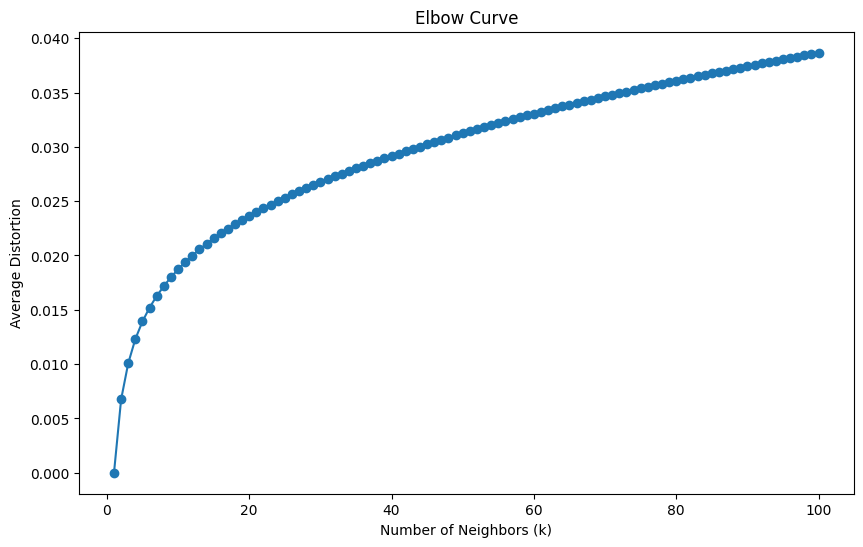

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def plot_elbow_curve(sim_matrix, max_k=20):
    """
    Plots the elbow curve to determine the optimal number of neighbors (k)
    for creating item neighborhoods.
    
    Args:
        sim_matrix (numpy.ndarray): The cosine similarity matrix
        max_k (int): The maximum number of neighbors to consider
    """
    distortions = []
    for k in range(1, max_k + 1):
        # Create neighborhoods using kNN with cosine metric
        nbrs = NearestNeighbors(n_neighbors=k, metric='cosine').fit(sim_matrix)
        distances, _ = nbrs.kneighbors(sim_matrix)
        distortions.append(np.mean(distances))
        
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Average Distortion')
    plt.title('Elbow Curve')
    plt.show()

plot_elbow_curve(game_similarity, max_k=100)

In [37]:
# Function to get the k-nearest neighbors for a given item
def get_knn(item_id, sim_matrix, k):
    # Sort the similarities for the given item in descending order
    sorted_indices = np.argsort(sim_matrix[item_id])[::-1]
    
    # Exclude the item itself from the neighbors
    sorted_indices = sorted_indices[sorted_indices != item_id]
    
    # Return the k nearest neighbors
    return sorted_indices[:k]

# Function to create item neighborhoods using kNN
def create_item_neighborhoods(sim_matrix, k):
    num_items = sim_matrix.shape[0]
    neighborhoods = {}
    
    for item_id in range(num_items):
        neighbors = get_knn(item_id, sim_matrix, k)
        neighborhoods[item_id] = neighbors
    
    return neighborhoods

k = 20  # Number of nearest neighbors
item_neighborhoods = create_item_neighborhoods(game_similarity, k)

# Print the neighbors for item 0
print(f"Neighbors of item 0: {item_neighborhoods[0]}")

Neighbors of item 0: [277 236 877 410 560 543 166 841 503 240 946 434 934 953 439 426 959  59
 446 295]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


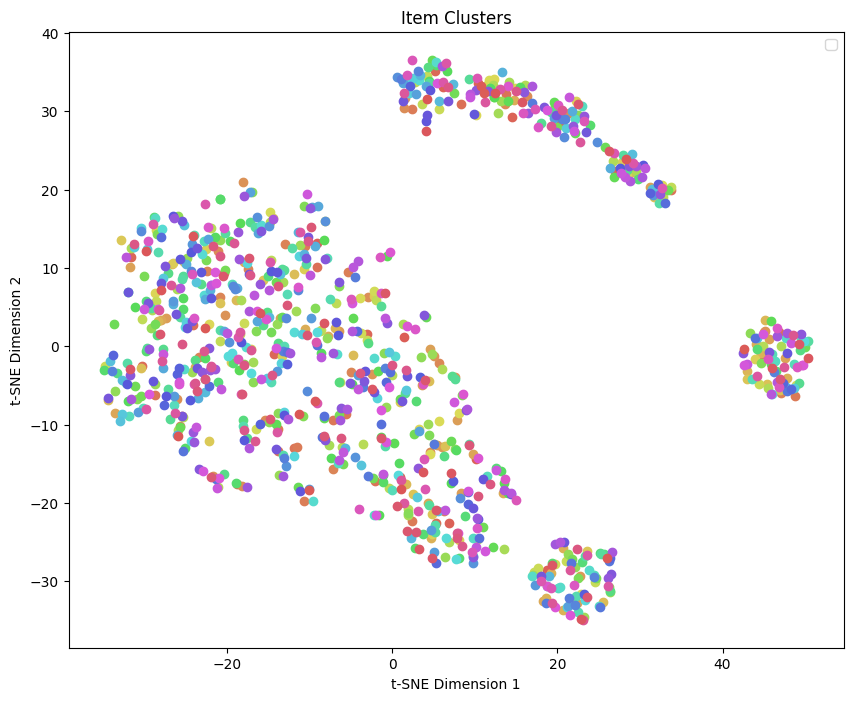

In [38]:
def plot_item_clusters(sim_matrix, item_neighborhoods, labels=None):
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    tsne_embeddings = tsne.fit_transform(sim_matrix)

    # Get unique neighborhoods
    unique_neighborhoods = list(set([tuple(neighbors) for neighbors in item_neighborhoods.values()]))

    # Create a color palette
    palette = np.array(sns.color_palette("hls", len(unique_neighborhoods)))

    # Plot the items
    plt.figure(figsize=(10, 8))
    for idx, neighborhood in enumerate(unique_neighborhoods):
        neighborhood = list(neighborhood)
        item_indices = [item for item, neighbors in item_neighborhoods.items() if np.array_equal(neighbors, neighborhood)]
        x, y = tsne_embeddings[item_indices, 0], tsne_embeddings[item_indices, 1]
        if labels:
            label = [labels[i] for i in item_indices]
            plt.scatter(x, y, color=palette[idx], label=label)
        else:
            plt.scatter(x, y, color=palette[idx])

    plt.legend()
    plt.title("Item Clusters")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()


game_name_labels = list(data.game_name.unique())
plot_item_clusters(game_similarity, item_neighborhoods)

def get_player_top_games(player_id, player_history_df, top_n=5):
    player_games = player_history_df[player_history_df['player_id'] == player_id]
    player_top_games = player_games['game_id'].value_counts().head(top_n).index.tolist()
    return player_top_games

In [39]:
def get_recommended_games(player_id, num_recommendations, player_history_df, game_similarity, item_neighborhoods):
    # Get the player's top played games
    top_games = get_player_top_games(player_id, player_history_df)
    
    # Get the similar games for each top game
    similar_games = set()
    for game_id in top_games:
        similar_games.update(item_neighborhoods[game_id])
    
    # Remove games already played by the player
    played_games = player_history_df[player_history_df['player_id'] == player_id]['game_id'].unique()
    recommended_games = list(similar_games - set(played_games))
    
    # Sort the recommended games based on similarity scores
    game_scores = []
    for game_id in recommended_games:
        score = np.mean([game_similarity[game_id][top_game] for top_game in top_games])
        game_scores.append((game_id, score))
    
    game_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Return the top recommended games
    top_recommendations = [game_id for game_id, _ in game_scores[:num_recommendations]]
    return top_recommendations

In [ ]:
player_id = 1  # Replace with the desired player_id
num_recommendations = 10  # Replace with the desired number of recommendations

recommended_games = get_recommended_games(player_id, num_recommendations, player_history_df, game_similarity, item_neighborhoods)
print(f"Recommended games for player {player_id}: {recommended_games}")

In [ ]:
for i in range(100):
    recommended_games = get_recommended_games(i, num_recommendations, player_history_df, game_similarity, item_neighborhoods)
    print(f"Recommended games for player {i}: {recommended_games}")